# Exercise 1: Linear Rgression

Instructions
------------

This jupyter notebook contains code that helps you get started on the Linear Regression exercise. You will need to complete the following function in this exercise:

- warmup_exercise
- plot_data
- gradient_descent
- compute_cost
- feature_normalize
- normal_equation

For this exercise, you will not need to change any code in this file, or any other files other than those mentioned above.

## Setup

In [356]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from ex1 import *

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Linear Regression with One Variable

### Part 1: Basic Function

5x5 Identity Matrix:

In [357]:
warmup_exercise()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

### Part 2: Plotting

In [358]:
data = np.loadtxt("./data/ex1data1.txt", delimiter=",")
X = data[:, 0]
y = data[:, 1]
m = len(X)

plot data

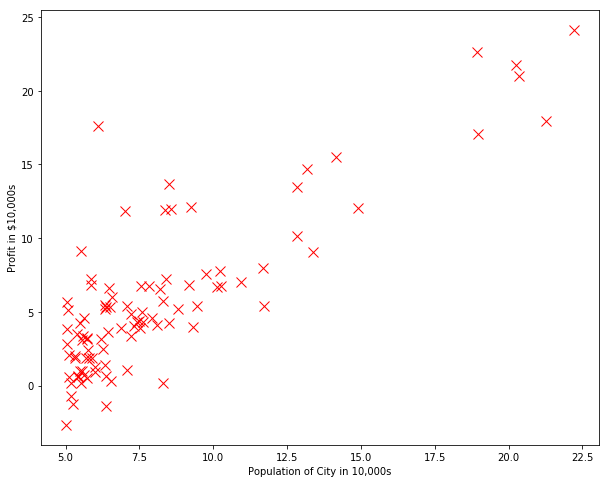

In [359]:
plot_data(X, y)

### Part 3: Cost and Gradient descent

In [360]:
X = np.c_[np.ones(m), X] # Add a column of ones to x

Testing the cost function...

In [361]:
# Some gradient descent settings
iterations = 1500
alpha = 0.01

In [362]:
compute_cost(X, y, np.zeros(2)) # Expected cost value (approx) 32.07

32.072733877455676

In [363]:
compute_cost(X, y, [-1, 2]) # Expected cost value (approx) 54.24

54.24245508201238

Running Gradient Descent...

In [364]:
theta, J_history  = gradient_descent(X, y, np.zeros(2), alpha, iterations)

In [365]:
theta # Expected theta values (approx) [-3.6303, 1.1664]

array([-3.63029144,  1.16636235])

Plot the linear fit

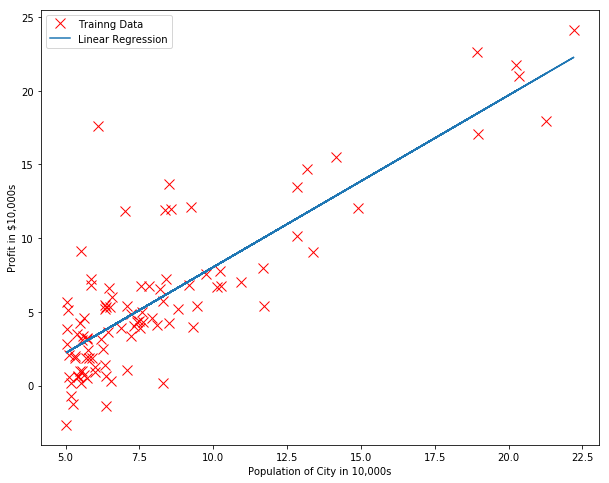

In [366]:
plot_data(X[:, 1], y)
plt.plot(X[:, 1], h(X, theta), '-', label="Linear Regression")
plt.legend()

Predict values for population sizes of 35,000 and 70,000

For population = 35,000, we predict a profit of

In [367]:
np.dot([1, 3.5], theta)*10000

4519.7678677017675

For population = 70,000, we predict a profit of

In [368]:
np.dot([1, 7], theta)*10000

45342.45012944714

### Part 4: Visualizing $J(\theta_0, \theta_1)$

In [369]:
# Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((theta0_vals.size, theta1_vals.size))

# Fill out J_vals
for i in range(theta0_vals.size):
    for j in range(theta1_vals.size):
        t = [theta0_vals[i], theta1_vals[j]]
        J_vals[i, j] = compute_cost(X, y, t)

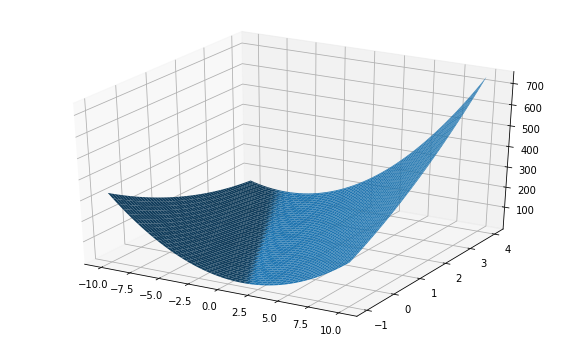

In [370]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,6))
ax = fig.gca(projection='3d')
theta0_vals, theta1_vals = np.meshgrid(theta0_vals, theta1_vals)
surf = ax.plot_surface(theta0_vals, theta1_vals, J_vals)

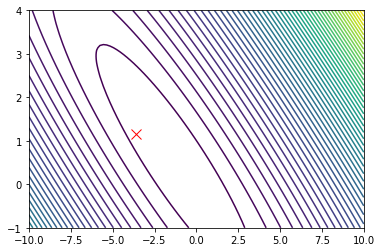

In [371]:
plt.contour(theta0_vals, theta1_vals, J_vals, 50)
plt.plot(theta[0], theta[1], 'rx', markersize=10)

## Linear Regression with Multi variable

In [372]:
# load Data
data = np.loadtxt("./data/ex1data2.txt", delimiter=',')
X = data[:, 0:2]
y = data[:, -1]
m = y.size

print out first 10 examples from the dataset

In [373]:
print(*["x = {}, y = {}".format(X[i, :], y[i]) for i in range(10)], sep="\n")

x = [2104.    3.], y = 399900.0
x = [1600.    3.], y = 329900.0
x = [2400.    3.], y = 369000.0
x = [1416.    2.], y = 232000.0
x = [3000.    4.], y = 539900.0
x = [1985.    4.], y = 299900.0
x = [1534.    3.], y = 314900.0
x = [1427.    3.], y = 198999.0
x = [1380.    3.], y = 212000.0
x = [1494.    3.], y = 242500.0


scale features and set them to zero mean

In [374]:
X, mu, sigma = feature_normalize(X)

In [375]:
X = np.c_[np.ones(m), X] #Add intercept term to X

### Part 2: Gradient Descent

In [376]:
alpha = 1
n_iters = 50

compare different learning rate

In [377]:
# Init Theta and Run Gradient Descent 
theta = np.zeros(3)
learning_rates = [0.01, 0.03, 0.1, 0.3, 1, 3]
results = [gradient_descent(X, y, theta, alpha, n_iters) for alpha in learning_rates]

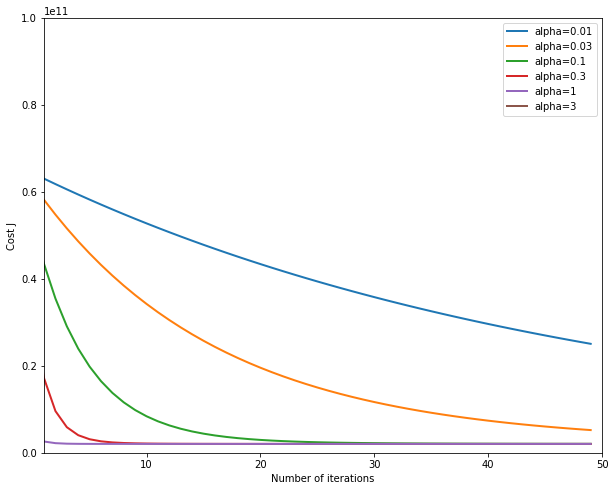

In [378]:
plt.figure(figsize=(10, 8))
for theta, J_history in results:
    plt.plot(J_history, '-', linewidth=2)
plt.axis([1, 50, 0,10**11])
plt.xlabel("Number of iterations")
plt.ylabel("Cost J")
plt.legend(["alpha={}".format(alpha) for alpha in learning_rates])

choose a best theta and make some prediction

In [379]:
theta = results[4][0]
theta

array([340412.65957447, 109447.79646961,  -6578.35485416])

Estimate the price of a 1650 sq-ft, 3 br house

In [380]:
x = np.r_[1, ([1650, 3] - mu)/sigma]
price = np.dot(x, theta)
price

293081.4643349083

### Part 3: Normal Equations

**Instructions:** 
The following code computes the closed form solution for linear regression using the normal equations. You should complete the function `normal_equation` in ex1.py

After doing so, you should complete this code to predict the price of a 1650 sq-ft, 3 br house.

In [381]:
# load Data
data = np.loadtxt("./data/ex1data2.txt", delimiter=',')
X = data[:, 0:2]
y = data[:, -1]
m = y.size
X = np.c_[np.ones(m), X]

Calculate the parameters from the normal equation and Display normal equation's result

In [382]:
theta = normal_equation(X, y)
theta

array([89597.90954361,   139.21067402, -8738.01911255])

Estimate the price of a 1650 sq-ft, 3 br house

In [383]:
price = np.dot([1, 1650, 3], theta)
price

293081.4643349892